In [27]:
df_main[:2]

,rate,hrswkd,statenum,agency_name,mi,class_code,class_title,ethnicity,gender,employee_type,hire_date,salary,experience
0,0.0,40.0,17758,texas department of transportation,L,2129,engineering specialist iii,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/01/10,54000.00,4232
1,0.0,40.0,80987,health and human services commission,G,1325,inspector v,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,43331.28,1583


In [28]:
df_main['hire_date'] = pd.to_datetime(df_main['hire_date'])

In [29]:
df_main[:2]

,rate,hrswkd,statenum,agency_name,mi,class_code,class_title,ethnicity,gender,employee_type,hire_date,salary,experience
0,0.0,40.0,17758,texas department of transportation,L,2129,engineering specialist iii,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2010-06-01,54000.00,4232
1,0.0,40.0,80987,health and human services commission,G,1325,inspector v,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-09-01,43331.28,1583


In [30]:
df_main['year_hired_date'] = df_main['hire_date'].apply(lambda x: x.year)

In [31]:
df_main[:2]

,rate,hrswkd,statenum,agency_name,mi,class_code,class_title,ethnicity,gender,employee_type,hire_date,salary,experience,year_hired_date
0,0.0,40.0,17758,texas department of transportation,L,2129,engineering specialist iii,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2010-06-01,54000.00,4232,2010
1,0.0,40.0,80987,health and human services commission,G,1325,inspector v,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2017-09-01,43331.28,1583,2017


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import prince

In [5]:
from datetime import date
import datetime

In [8]:
df_main = pd.read_csv('../data/train_val_data.csv')
df_test = pd.read_csv('../data/test_data.csv')

In [9]:
df_main.drop(['summed_annual_salary'], inplace=True, axis = 1)
df_test.drop(['summed_annual_salary'], inplace=True, axis = 1)

In [10]:
df_test.rename(columns = {'annual':'salary'}, inplace = True)
df_main.rename(columns = {'annual':'salary'}, inplace = True)

In [11]:
date_ref = date(2022,1,1)

In [12]:
def experience(list_date, date_base):
    exp = []
    for date_temp in list_date:
        date_res = date_base - datetime.datetime.strptime(date_temp, '%m/%d/%y').date()
        exp.append(abs(date_res.days))       
    return exp

In [13]:
list_main_date = list(df_main['hire_date'])
list_test_date = list(df_test['hire_date'])

In [14]:
xp_main = experience(list_main_date, date_ref)
xp_test = experience(list_test_date, date_ref)

In [15]:
df_main["experience"] = xp_main
df_test["experience"] = xp_test

In [40]:
df_main['gender'].value_counts()

FEMALE             67447
MALE               50030
Name: gender, dtype: int64

In [16]:
import seaborn as sns
%matplotlib inline

In [33]:
sns.set(rc={'figure.figsize':(10,7)})

<AxesSubplot:xlabel='gender', ylabel='salary'>

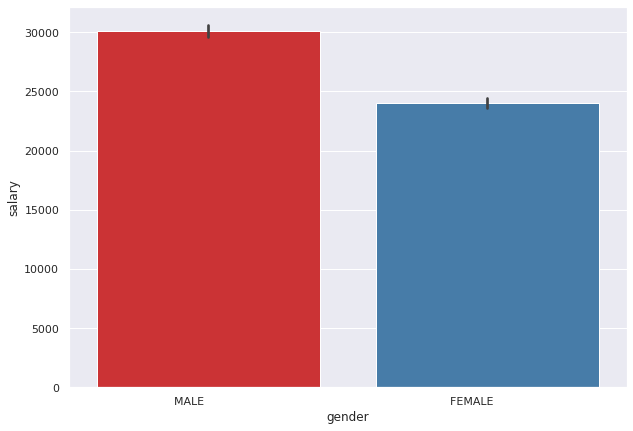

In [18]:
sns.barplot(x='gender',y='salary',data=df_main,estimator=np.std, palette='Set1')

<AxesSubplot:xlabel='gender', ylabel='year_hired_date'>

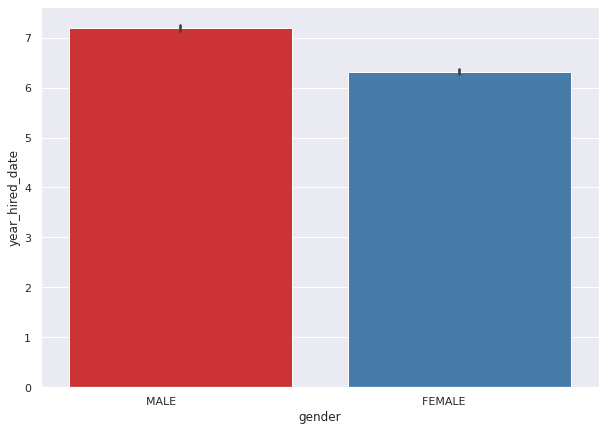

In [34]:
sns.barplot(x='gender',y='year_hired_date',data=df_main, estimator=np.std, palette='Set1')

In [41]:
2500/365

6.8493150684931505

<AxesSubplot:xlabel='gender', ylabel='experience'>

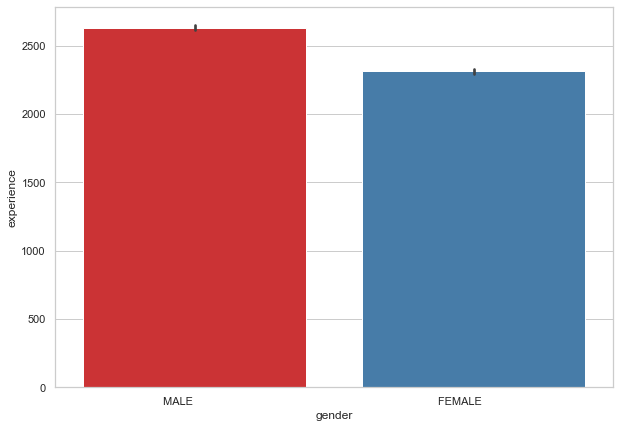

In [241]:
sns.barplot(x='gender',y='experience',data=df_main, estimator=np.std, palette='Set1')

In [24]:
sns.set(rc={'figure.figsize':(20,15)})

<AxesSubplot:xlabel='year_hired_date', ylabel='salary'>

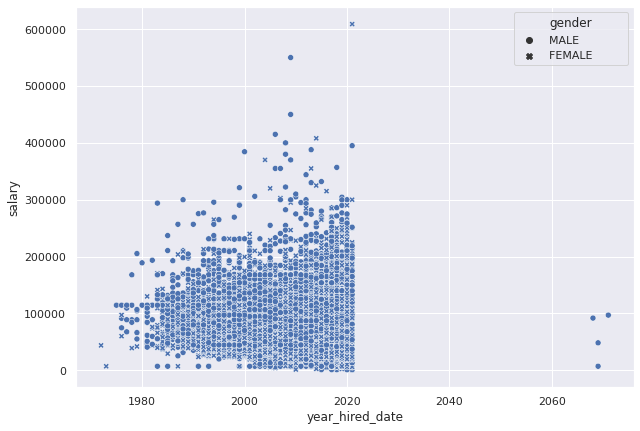

In [37]:
sns.scatterplot(x = "year_hired_date", y = "salary", data = df_main, style = "gender")

<AxesSubplot:xlabel='experience', ylabel='salary'>

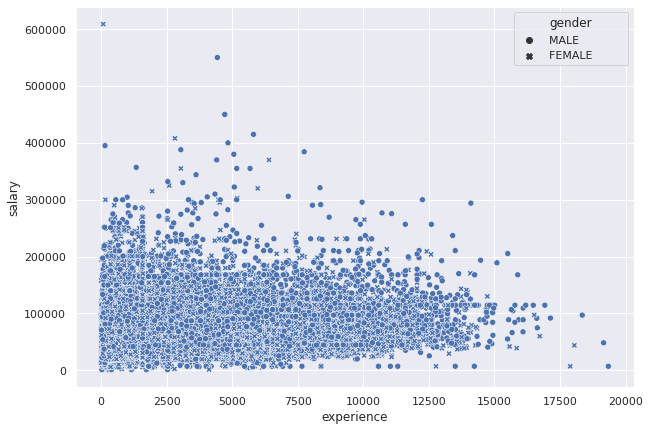

In [36]:
sns.scatterplot(x = "experience", y = "salary", data = df_main, style = "gender")

<AxesSubplot:xlabel='experience', ylabel='annual'>

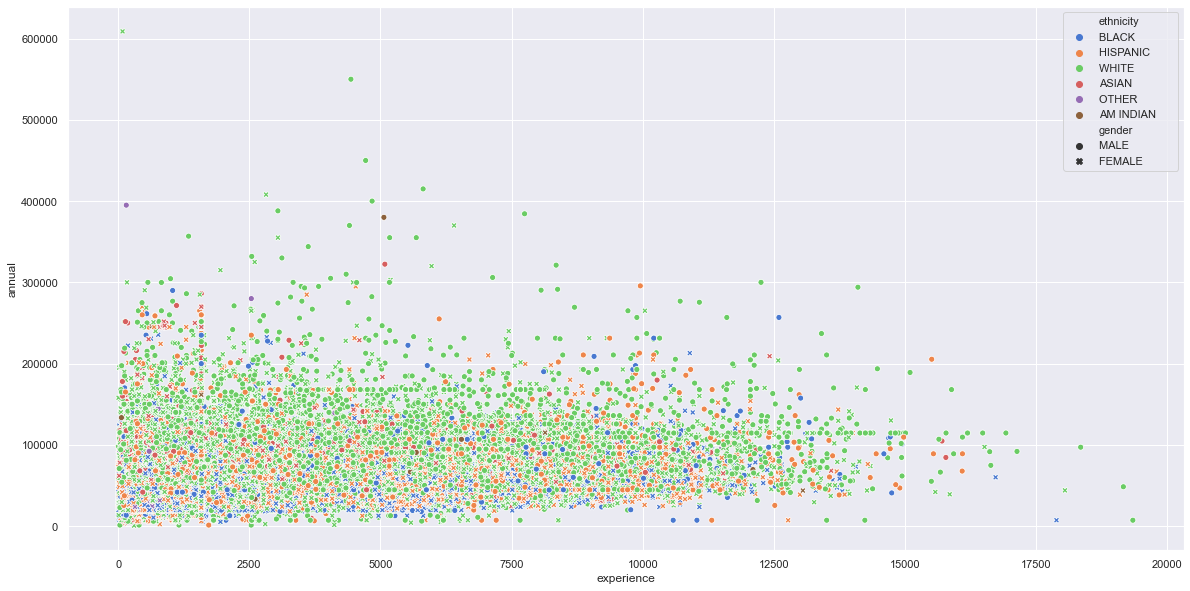

In [206]:
sns.scatterplot(x = "experience", y = "salary", data = df_main, hue = "ethnicity", palette="muted", style='gender')

In [21]:
df_trie = df_main[df_main['salary'] < 300000]

In [22]:
df_trie = df_trie[df_trie['experience'] < 15000]

<AxesSubplot:xlabel='experience', ylabel='salary'>

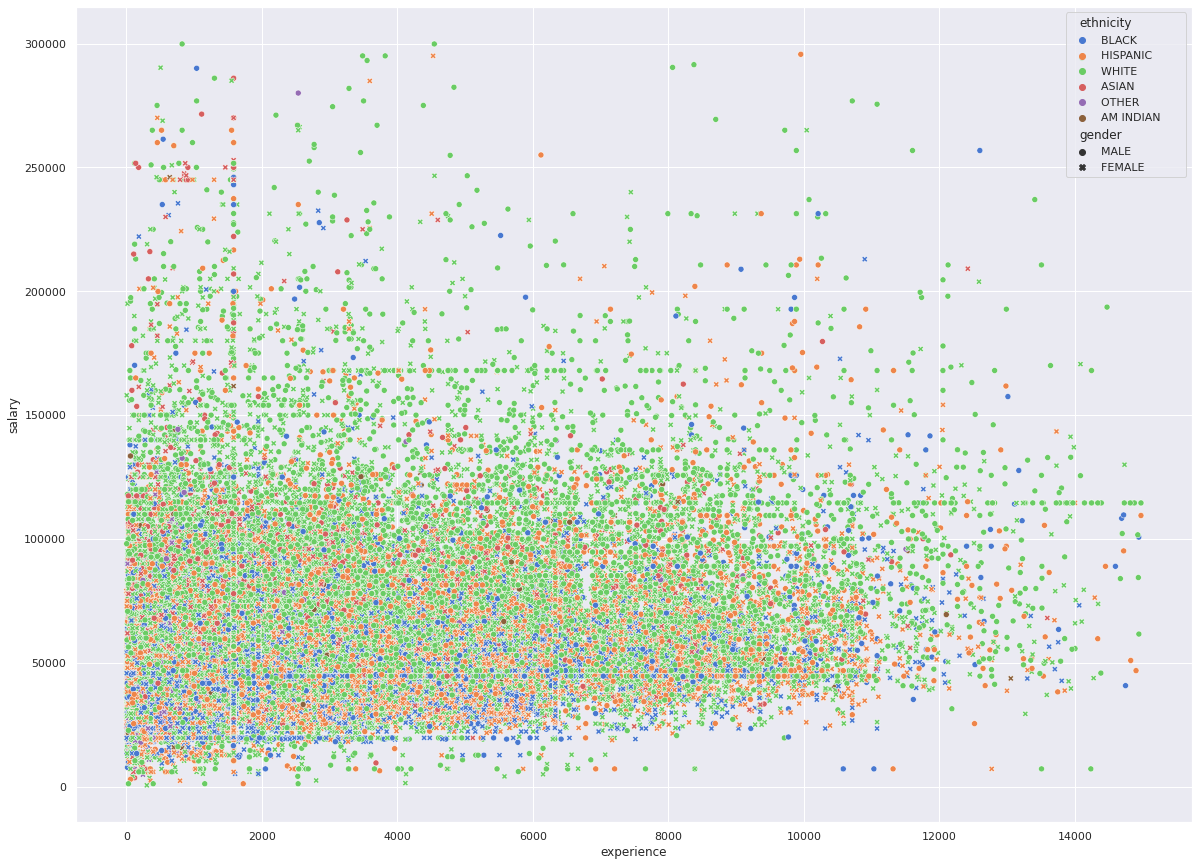

In [25]:
sns.scatterplot(x = "experience", y = "salary", data = df_trie, hue = "ethnicity", palette="muted", style='gender')

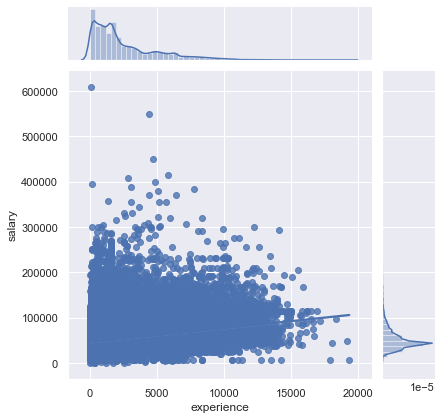

In [256]:
sns.jointplot(x="experience", y="salary", data=df_main, kind="reg");

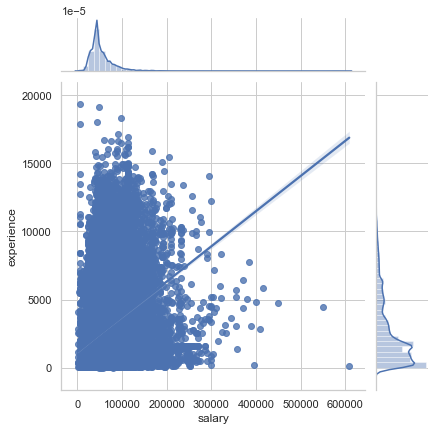

In [233]:
sns.jointplot(x="salary", y="experience", data=df_main, kind="reg");

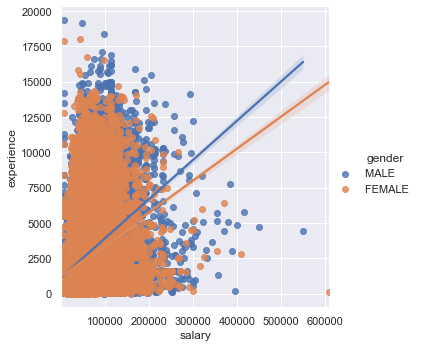

In [297]:
sns.lmplot(x="salary", y="experience", hue="gender", data=df_main, legend_out=True, scatter=True, fit_reg=True)

In [42]:
sns.set(rc={'figure.figsize':(10,7)})

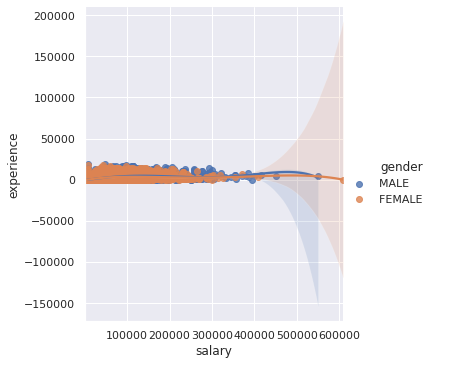

In [45]:
sns.lmplot(x="salary", y="experience", hue="gender", data=df_main, legend_out=True, scatter=True, fit_reg=True, order=5)

<AxesSubplot:xlabel='experience', ylabel='salary'>

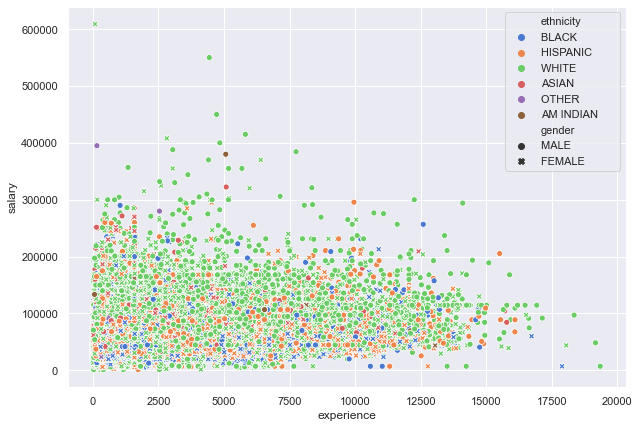

In [317]:
sns.scatterplot(x = "experience", y = "salary", data = df_main, hue = "ethnicity", palette="muted", style='gender')

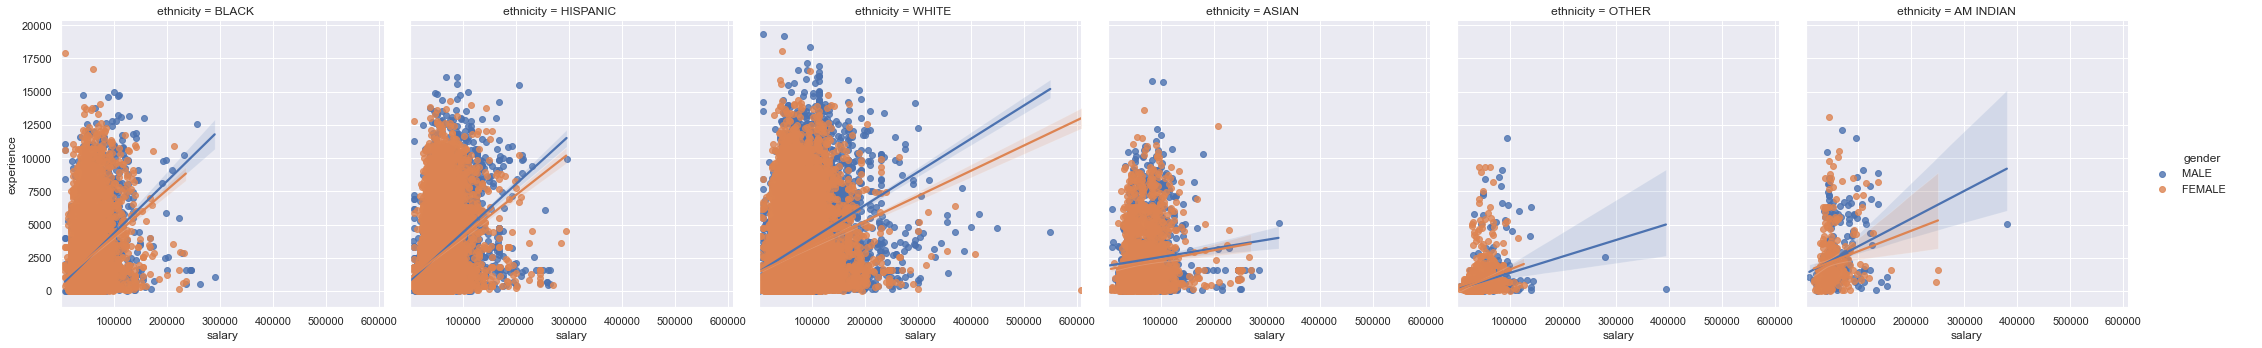

In [260]:
sns.lmplot(x="salary", y="experience", hue="gender", col="ethnicity", data=df_main, aspect=.5);

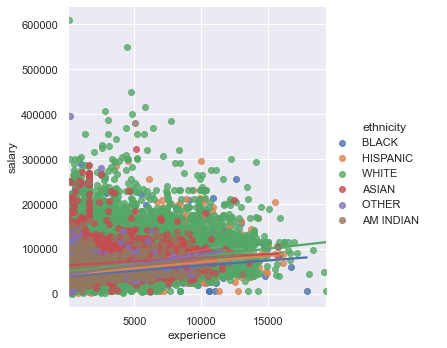

In [267]:
sns.lmplot(x="experience", y="salary", hue="ethnicity", data=df_main)

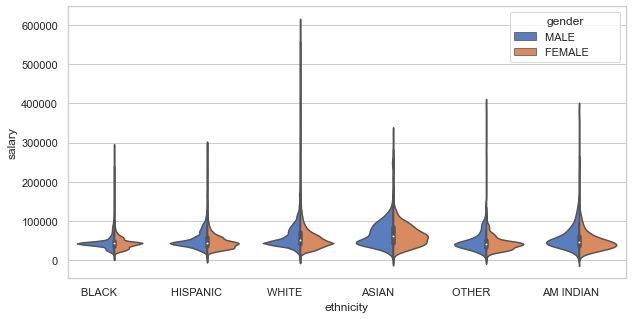

<Figure size 720x504 with 0 Axes>

In [232]:
sns.set_style('whitegrid')
ax = sns.violinplot(x="ethnicity", y="salary", hue="gender",data=df_main, palette="muted", split=True)#, inner="stick"

<AxesSubplot:xlabel='ethnicity', ylabel='salary'>

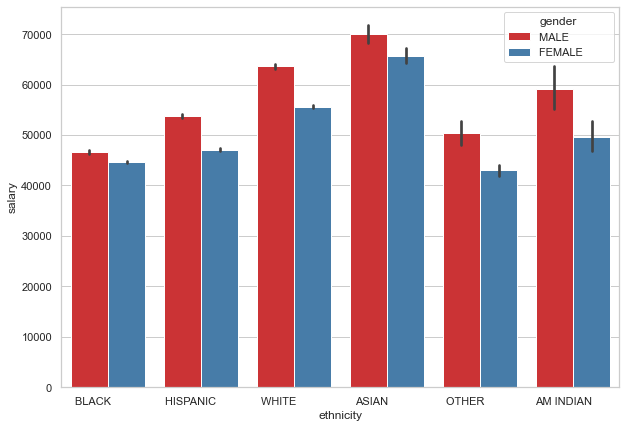

In [236]:
sns.barplot(x="ethnicity", y="salary", data=df_main,hue='gender',palette='Set1')

<AxesSubplot:xlabel='ethnicity', ylabel='experience'>

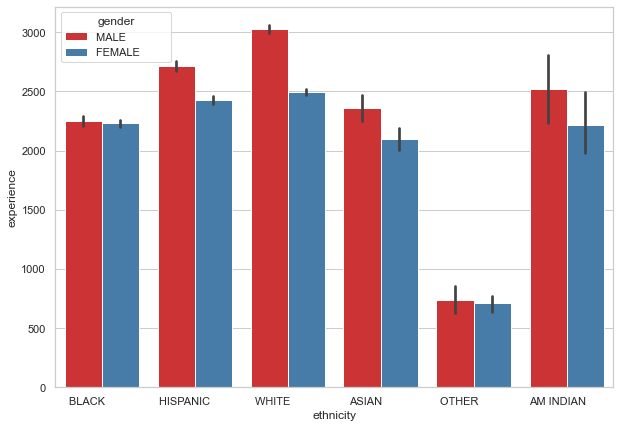

In [238]:
sns.barplot(x="ethnicity", y="experience", data=df_main,hue='gender',palette='Set1')

<AxesSubplot:xlabel='gender', ylabel='salary'>

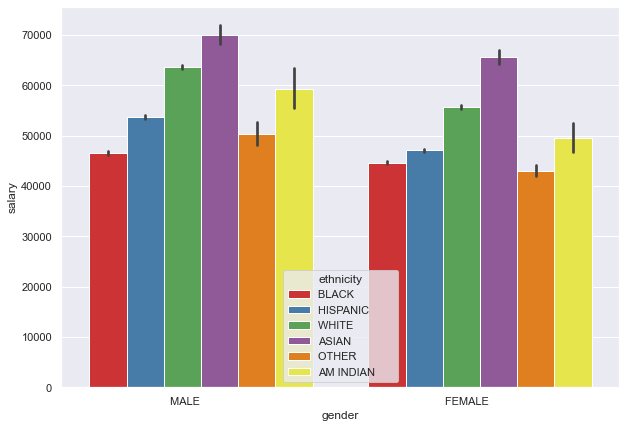

In [299]:
sns.barplot(x="gender", y="salary", data=df_main,hue='ethnicity',palette='Set1')

In [251]:
sns.set(rc={'figure.figsize':(10,7)})

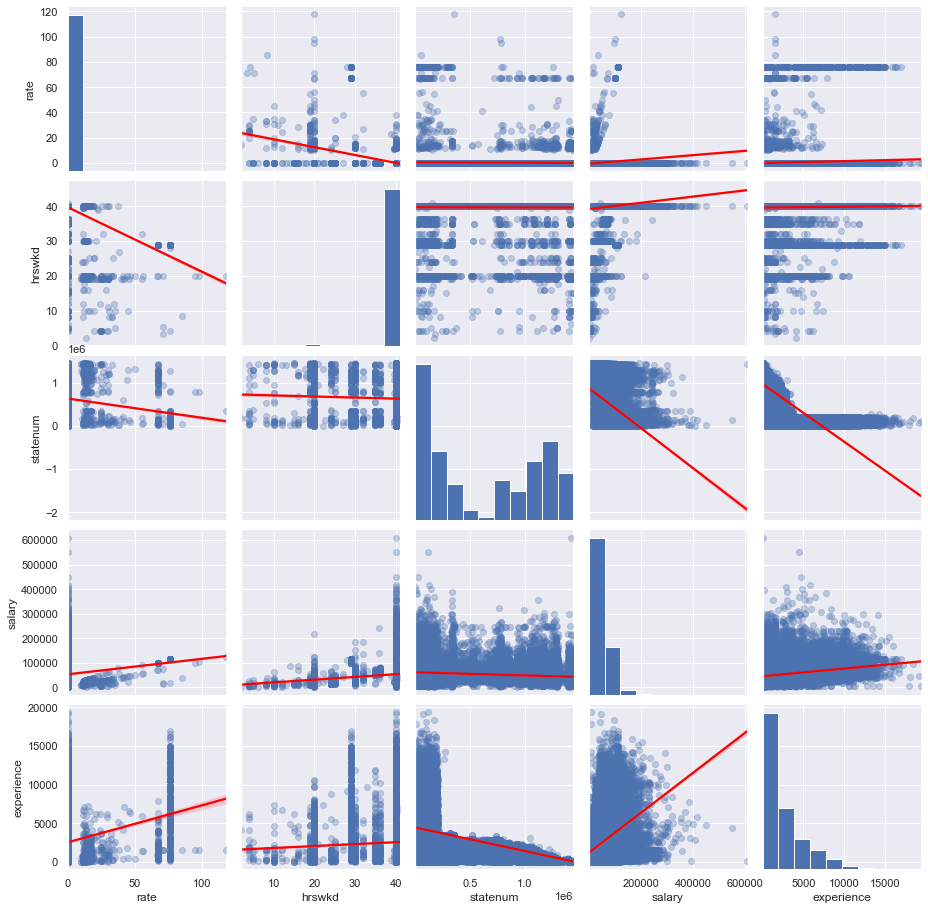

In [268]:
ax = sns.pairplot(df_main, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3}})

In [292]:
def xp_par_annee(list_xp):
    list_xp_norm = []
    for xp in list_xp:
        for i in range(1,20):
            if xp <= 365*i:
                list_xp_norm.append(i)
                break
            if i == 19:
                list_xp_norm.append(i+1)
    return list_xp_norm

In [289]:
list_xp_norm = xp_par_annee(df_main["experience"])

hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe


hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe


hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe


hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe
hehe


In [290]:
df_main["xp_normalised"] = list_xp_norm

In [295]:
df_main["xp_normalised"].describe()

count    117477.000000
mean          7.142905
std           5.864706
min           1.000000
25%           3.000000
50%           5.000000
75%          10.000000
max          20.000000
Name: xp_normalised, dtype: float64

In [293]:
sns.set(rc={'figure.figsize':(10,7)})

<AxesSubplot:xlabel='salary', ylabel='xp_normalised'>

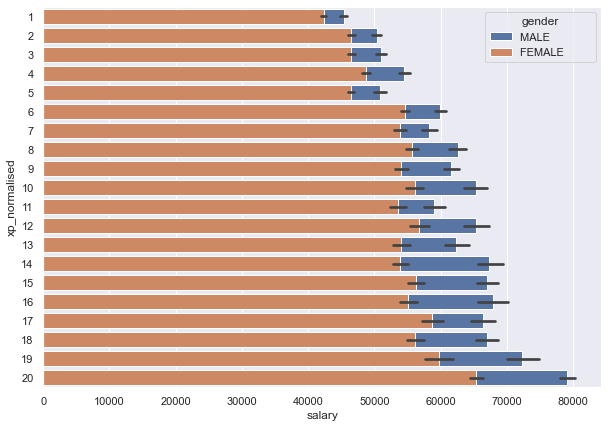

In [366]:
sns.barplot(data=df_main, x='salary',y='xp_normalised',hue='gender',orient='horizontal', dodge=False)

In [406]:
def xp_gender_normalise(list_xp_normed, list_genre):
    list_xp_gender_norm = []
    for i in range(0,len(list_xp_normed)):
        if list_genre[i] == 'MALE           ':
            list_xp_gender_norm.append(list_xp_normed[i])
        else:
            list_xp_gender_norm.append(list_xp_normed[i]*-1)
    return list_xp_gender_norm

In [407]:
list_xp_norm_genred = xp_gender_normalise(list(df_main["xp_normalised"]), list(df_main["gender"]))

In [408]:
df_main["xp_gender_normalised"] = list_xp_norm_genred

In [409]:
df_main[:5]

,rate,hrswkd,statenum,agency_name,mi,class_code,class_title,ethnicity,gender,employee_type,hire_date,salary,experience,xp_normalised,xp_gender_normalised,salary_normalised
0,0.0,40.0,17758,texas department of transportation,L,2129,engineering specialist iii,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/01/10,54000.00,4232,12,12,55000
1,0.0,40.0,80987,health and human services commission,G,1325,inspector v,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,43331.28,1583,5,-5,45000
2,0.0,40.0,18023,department of public safety,,0174,license and permit spec v,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,02/13/12,59438.88,3610,10,10,60000
3,0.0,40.0,1269844,texas department of transportation,,9305,trans maint spec i,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/22/20,37200.00,558,2,2,40000
4,0.0,40.0,184217,department of family and protective services,G,0156,administrative asst iv,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,08/01/97,35533.08,8919,20,-20,40000


In [360]:
def salary_par_5000(list_salary):
    list_salary_norm = []
    for salary in list_salary:
        for i in range(1,16):
            if salary <= 5000*i:
                list_salary_norm.append(5000*i)
                break
            if i == 15:
                list_salary_norm.append(5000*(i+1))
    return list_salary_norm

In [361]:
list_salary_normed = salary_par_5000(df_main["salary"])

In [363]:
df_main["salary_normalised"] = list_salary_normed

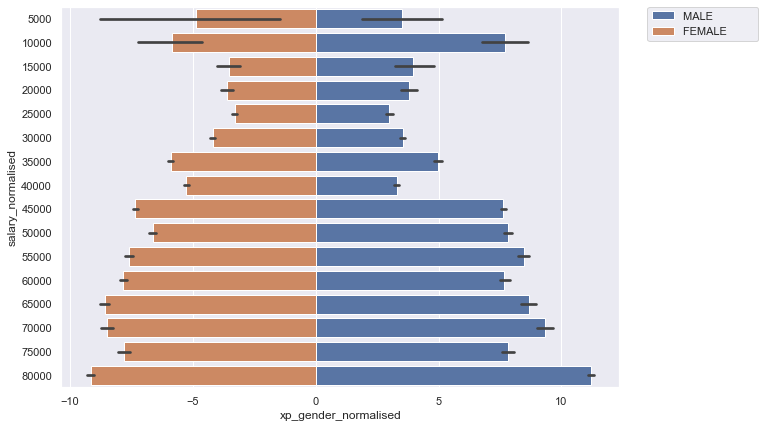

In [412]:
sns.barplot(data=df_main, x='xp_gender_normalised',y='salary_normalised', hue='gender',orient='horizontal', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='xp_gender_normalised', ylabel='salary_normalised'>

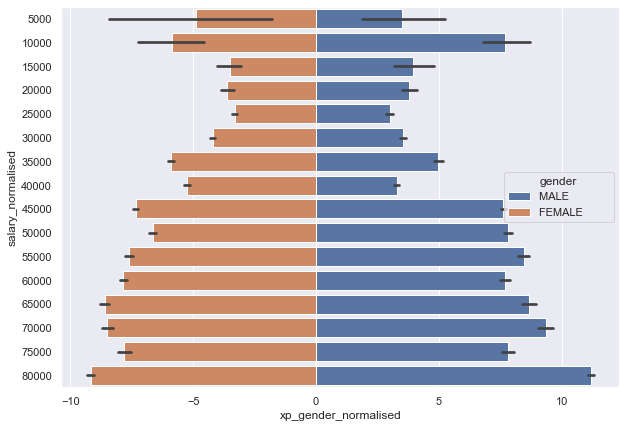

In [413]:
sns.barplot(data=df_main, x='xp_gender_normalised',y='salary_normalised', hue='gender',orient='horizontal', dodge=False)


['', '10', '5', '0', '5', '10', '']


<ipython-input-428-445310744534>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=labels)


[[Text(-15.0, 0, ''),
  Text(-10.0, 0, '10'),
  Text(-5.0, 0, '5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '')]]

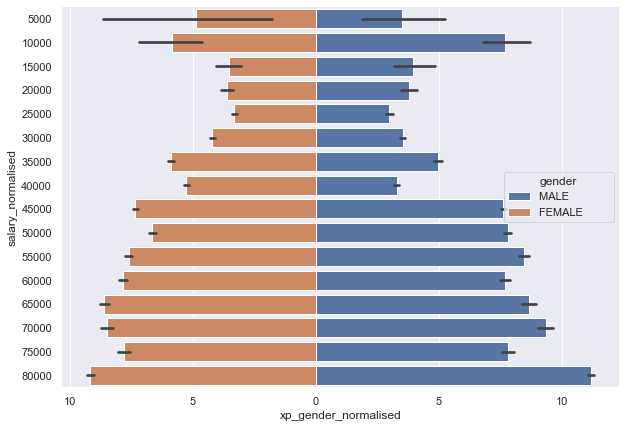

In [428]:
f, ax = plt.subplots(figsize=(10,7))

ax = sns.barplot(data=df_main, x='xp_gender_normalised',y='salary_normalised', hue='gender',orient='horizontal', dodge=False)
sns.despine()

n = len(ax.get_xticklabels())
labels = ['' for i in range(n)]
labels[1] = '10'
labels[2] = '5'
labels[3] = '0'
labels[4] = '5'
labels[5] = '10'
print(labels)
ax.set(xticklabels=labels)

In [427]:
sns.set_style('darkgrid')